In [1]:
# Импорты
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import datetime as dt

In [2]:
# Считываем файлики
train = pd.read_csv("train.csv")
macro = pd.read_csv("macro.csv")


Задание 1. "Обработка отсутствующих значений"

In [3]:
# Анализируем train.csv
train.isnull().sum()

id                       0
timestamp                0
full_sq                  0
life_sq               6383
floor                  167
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
Length: 292, dtype: int64

In [4]:
# Анализируем macro.csv
macro.isnull().sum()

timestamp                         0
oil_urals                         0
gdp_quart                        90
gdp_quart_growth                 90
cpi                              31
                               ... 
bandwidth_sports                658
population_reg_sports_share    1023
students_reg_sports_share      1023
apartment_build                 658
apartment_fund_sqm              658
Length: 100, dtype: int64

In [5]:
# Сохраняем списки параметров, с которыми будем производить манипуляции
columns_to_drop_train = [ 'max_floor', 'material', 'build_year', 'kitch_sq', 'state', 'preschool_quota', 'school_quota', 'hospital_beds_raion', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame', 'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 'build_count_mix', 'raion_build_count_with_builddate_info', 'build_count_before_1920', 'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995', 'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_avg_price_500', 'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500', 'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000']
values_to_refill_train = ['life_sq', 'floor', 'num_room', 'metro_min_walk', 'metro_km_walk', 'railroad_station_walk_km', 'railroad_station_walk_min', 'ID_railroad_station_walk', 'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000', 'prom_part_5000', 'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000', 'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000']

columns_to_drop_macro = ['grp', 'grp_growth', 'real_dispos_income_per_cap_growth', 'salary_growth', 'profitable_enterpr_share', 'unprofitable_enterpr_share', 'share_own_revenues', 'overdue_wages_per_cap', 'fin_res_per_cap', 'marriages_per_1000_cap', 'divorce_rate', 'construction_value', 'invest_fixed_assets_phys', 'pop_migration', 'pop_total_inc', 'housing_fund_sqm', 'lodging_sqm_per_cap', 'water_pipes_share', 'baths_share', 'sewerage_share', 'gas_share', 'hot_water_share', 'electric_stove_share', 'heating_share', 'old_house_share', 'infant_mortarity_per_1000_cap', 'perinatal_mort_per_1000_cap', 'incidence_population', 'load_of_teachers_preschool_per_teacher', 'child_on_acc_pre_school', 'students_state_oneshift', 'modern_education_share', 'old_education_build_share', 'provision_doctors', 'power_clinics', 'hospital_beds_available_per_cap', 'hospital_bed_occupancy_per_year', 'provision_retail_space_sqm', 'provision_retail_space_modern_sqm', 'theaters_viewers_per_1000_cap', 'museum_visitis_per_100_cap', 'bandwidth_sports', 'population_reg_sports_share', 'students_reg_sports_share', 'apartment_build', 'apartment_fund_sqm']
rows_to_drop_macro = ['usdrub', 'eurrub', 'brent', 'micex_cbi_tr']
values_to_refill_macro = ['gdp_quart', 'gdp_quart_growth', 'cpi', 'ppi', 'gdp_deflator', 'balance_trade', 'balance_trade_growth', 'net_capital_export', 'average_provision_of_build_contract_moscow', 'rts', 'micex', 'micex_rgbi_tr', 'deposits_growth', 'deposits_rate', 'mortgage_growth', 'retail_trade_turnover', 'retail_trade_turnover_per_cap', 'retail_trade_turnover_growth', 'labor_force', 'unemployment', 'employment', 'invest_fixed_capital_per_cap', 'invest_fixed_assets', 'pop_natural_increase', 'childbirth', 'mortality', 'average_life_exp', 'rent_price_4+room_bus', 'rent_price_3room_bus', 'rent_price_2room_bus', 'rent_price_1room_bus', 'rent_price_3room_eco', 'rent_price_2room_eco', 'rent_price_1room_eco', 'load_of_teachers_school_per_teacher', 'provision_nurse', 'load_on_doctors', 'turnover_catering_per_cap', 'seats_theather_rfmin_per_100000_cap', 'income_per_cap', 'salary']


In [6]:
# Файл macro.csv
# Удаляем строки, где пропущены параметры, содержащиеся в списке rows_to_drop_macro
processed_macro = macro.dropna(subset=rows_to_drop_macro)
# Удаляем столбцы, где пропущены параметры, содержащиеся в списке columns_to_drop_macro
processed_macro = processed_macro.drop(columns_to_drop_macro, axis=1)
# Заполняем параметры, содержащиеся в списке values_to_refill_macro
for p in values_to_refill_macro:
    processed_macro[p] = processed_macro[p].fillna(processed_macro[p].mean())

In [7]:
# Файл train.csv
# Удаляем столбцы, где пропущены параметры, содержащиеся в списке columns_to_drop_train
processed_train = train.drop(columns_to_drop_train, axis=1)
# Заполняем параметры, содержащиеся в списке values_to_refill_train
for p in values_to_refill_train:
    processed_train[p] = processed_train[p].fillna(processed_train[p].mean())

Задание 2. "Обработка лишних значений"

In [8]:
# Выведем и сохраним те параметры из train.csv, у которых частота совпадения значений больше 95%
num_rows_train = len(processed_train.index)
low_information_cols_train = [] 

for col in processed_train.columns:
    cnts = processed_train[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows_train).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols_train.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

oil_chemistry_raion: 99.02858%
oil_chemistry_raion
no     30175
yes      296
Name: count, dtype: int64

railroad_terminal_raion: 96.27187%
railroad_terminal_raion
no     29335
yes     1136
Name: count, dtype: int64

nuclear_reactor_raion: 97.16780%
nuclear_reactor_raion
no     29608
yes      863
Name: count, dtype: int64

big_road1_1line: 97.43691%
big_road1_1line
no     29690
yes      781
Name: count, dtype: int64

railroad_1line: 97.06934%
railroad_1line
no     29578
yes      893
Name: count, dtype: int64

cafe_count_500_price_high: 97.25641%
cafe_count_500_price_high
0    29635
1      787
2       38
3       11
Name: count, dtype: int64

mosque_count_500: 99.51101%
mosque_count_500
0    30322
1      149
Name: count, dtype: int64

cafe_count_1000_price_high: 95.52689%
cafe_count_1000_price_high
0    29108
1     1104
2      145
3       51
4       39
5       15
6        8
7        1
Name: count, dtype: int64

mosque_count_1000: 98.08342%
mosque_count_1000
0    29887
1      584
Name: cou

Проанализировав полученные данные, можно сделать вывод о том, что параметров 'mosque_count_1500', 'mosque_count_1000', 'mosque_count_1000', 'mosque_count_500', 'cafe_count_500_price_high', 'railroad_1line', 'big_road1_1line', 'nuclear_reactor_raion', 'railroad_terminal_raion', 'oil_chemistry_raion' являются неинформативными, т.к. в более чем в 95% случаев они имеют одно и тоже значение в разных строках. Рациональным решением является удаление данных параметров из выборки.

In [9]:
# Удаляем столбцы с неинформативными значениями из train.csv
processed_train = processed_train.drop(low_information_cols_train, axis=1)

In [10]:
# Выведем и сохраним те параметры из macro.csv, у которых частота совпадения значений больше 95%
num_rows_macro = len(processed_macro.index)
low_information_cols_macro = [] 

for col in processed_macro.columns:
    cnts = processed_macro[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows_macro).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols_macro.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

В файле macro.csv неинформативных данных не оказалось.

Задание 3. "Выявление аномалий"

In [11]:
processed_train.describe()

,id,full_sq,life_sq,floor,num_room,area_m,raion_popul,green_zone_part,indust_part,children_preschool,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,1.909804,1.765705e+07,84056.425552,0.218922,0.118871,5140.026156,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,46.487729,5.305390,0.705433,2.064961e+07,57871.285899,0.175090,0.118688,3816.625140,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,2.081628e+06,2546.000000,0.001879,0.000000,175.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,22.000000,3.000000,1.909804,7.307411e+06,21819.000000,0.063755,0.019509,1706.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,34.403271,7.000000,1.909804,1.050803e+07,83502.000000,0.167526,0.072158,4857.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,38.000000,11.000000,2.000000,1.803644e+07,122862.000000,0.336177,0.195781,7103.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,19.000000,2.060718e+08,247469.000000,0.852923,0.521867,19223.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


В приведенной таблице хорошо видны выбросы - сильно завышенные значения. Например, у параметра full_sq большинство значений не превышают 65, в то время как максимальное значение данного параметра в выборке составляет 5326. Для обработки выбросов необходимо удалить аномальные строки.

In [12]:
# Очистим числовые параметры train.csv от выбросов
numeric_cols_train = processed_train.select_dtypes(include=np.number).columns.tolist()[1:]
processed_train = processed_train[(np.abs(stats.zscore(processed_train[numeric_cols_train])) < 3).all(axis=1)]

In [13]:
# Проверим, что данные в норме
processed_train.describe()

,id,full_sq,life_sq,floor,num_room,area_m,raion_popul,green_zone_part,indust_part,children_preschool,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,1.625900e+04,16259.000000,16259.000000,16259.000000,16259.000000,...,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,1.625900e+04
mean,14936.259364,52.013100,32.954531,7.715912,1.877789,1.571877e+07,82391.892613,0.222941,0.130040,4990.359247,...,12.963466,3.593394,0.393567,7.981487,18.387047,0.349960,3.304816,44.416200,5.653976,6.623003e+06
std,8744.172296,17.225549,14.024231,5.012671,0.651251,1.430286e+07,53884.605075,0.171956,0.124602,3372.725782,...,20.278644,6.393448,1.367842,9.284276,16.260427,0.538054,5.852176,31.620688,4.653257,3.140733e+06
min,4.000000,0.000000,0.000000,0.000000,0.000000,2.104405e+06,2546.000000,0.011048,0.000000,175.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7350.500000,38.000000,21.000000,4.000000,1.000000,7.587523e+06,21819.000000,0.065409,0.019509,1706.000000,...,1.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,12.000000,1.000000,4.800000e+06
50%,14749.000000,48.000000,34.000000,7.000000,1.909804,1.050803e+07,83502.000000,0.183969,0.075779,4993.000000,...,8.000000,2.000000,0.000000,7.000000,15.000000,0.000000,1.000000,43.000000,5.000000,6.193849e+06
75%,22494.000000,62.000000,37.000000,11.000000,2.000000,1.844581e+07,125111.000000,0.348986,0.219006,7454.000000,...,14.000000,4.000000,0.000000,10.000000,23.000000,1.000000,4.000000,64.000000,10.000000,7.900000e+06
max,30472.000000,156.000000,163.000000,23.000000,4.000000,6.677245e+07,178473.000000,0.683844,0.460556,14080.000000,...,240.000000,91.000000,18.000000,102.000000,168.000000,2.000000,67.000000,171.000000,20.000000,2.140000e+07


In [14]:
processed_macro.describe()

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_school_per_teacher,provision_nurse,load_on_doctors,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap
count,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,...,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000
mean,86.479693,16993.230075,1.523726,407.808398,480.216347,110.122308,15.344006,16.846742,40.732406,50.444801,...,72.050109,52.872040,47.299711,38.895364,31.002442,1455.301682,96.162386,7983.867740,8695.310329,0.443444
std,27.542991,3130.673100,2.824769,65.522919,69.888461,13.694284,3.856149,16.688079,15.006583,13.905912,...,7.997285,5.355515,2.898275,4.753201,3.761015,68.674086,3.102664,556.018935,1565.994420,0.015048
min,29.112500,9995.800000,-4.500000,315.100000,337.200000,86.721000,5.823000,-4.100000,27.276300,37.445400,...,53.730000,41.880000,37.540000,0.100000,2.310000,1356.112607,90.800000,6899.930464,6221.000000,0.410000
25%,61.283300,14925.000000,0.400000,354.000000,438.400000,100.000000,12.785000,7.200000,30.508800,40.242600,...,68.420000,50.680000,45.710000,38.040000,29.830000,1391.710938,92.800000,7804.909725,6943.000000,0.439390
50%,101.416500,17138.900000,1.523726,393.000000,473.500000,110.122308,16.041000,14.100000,32.316500,42.862200,...,72.050109,52.530000,47.299711,38.910000,31.002442,1453.830605,96.500000,7983.867740,8695.310329,0.447840
75%,109.310000,19284.100000,4.100000,469.400000,520.700000,123.661000,18.076000,21.500000,53.752300,61.323700,...,75.020000,54.500000,49.290000,41.180000,32.930000,1517.954545,99.400000,8296.038659,10311.000000,0.453560
max,122.520000,22016.100000,5.200000,531.000000,606.100000,133.160000,21.939000,75.800000,82.276400,90.881500,...,96.000000,72.020000,53.210000,43.850000,35.370000,1573.650623,99.600000,8846.956102,10805.000000,0.458880


В macro.csv аномалий не обнаружено.

Задание 4. "Сбалансированность"

Сбалансированность имеет смысл оценивать по ключевым признакам. Например, в train.csv такими будут являться price_doc, full_sq, sub_area, num_room. В macro.csv представлены фактические данные (условия сделок из train.csv), поэтому нет смысла оценивать его сбалансированность. 

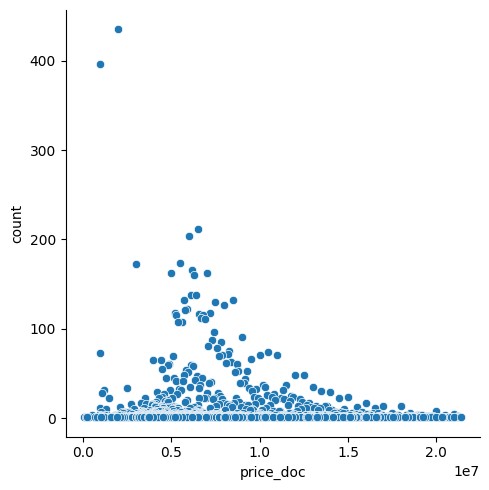

In [15]:
price_doc_info = processed_train['price_doc'].value_counts().reset_index()
sns.relplot(y="count", x="price_doc", data=price_doc_info)

По графику выше можно понять, что датасет является несбалансированным, т.к. соотношение значений цены квартир не равно 1:1

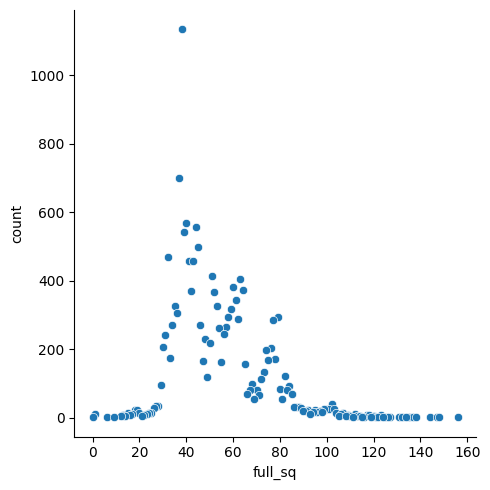

In [16]:
full_sq_info = processed_train['full_sq'].value_counts().reset_index()
sns.relplot(x="full_sq", y="count", data=full_sq_info)


По графику выше можно понять, что датасет является несбалансированным, т.к. соотношение значений общей площади квартир не равно 1:1

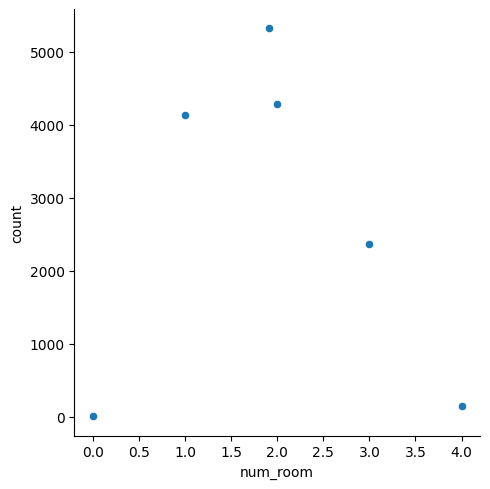

In [17]:
num_room_info = processed_train['num_room'].value_counts().reset_index()
sns.relplot(x="num_room", y="count", data=num_room_info)

По графику выше можно понять, что датасет является несбалансированным, т.к. соотношение значений количества комнат не равно 1:1, хотя оно ближе к нему, чем в случаях с другими параметрами.

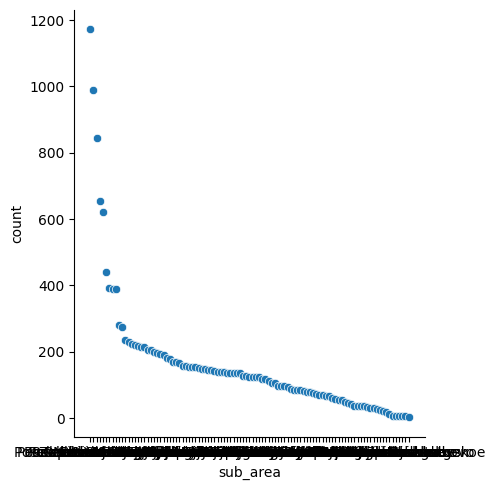

In [18]:
sub_area_info = processed_train['sub_area'].value_counts().reset_index()
sns.relplot(x="sub_area", y="count", data=sub_area_info)

По графику выше можно понять, что датасет является несбалансированным, т.к. соотношение значений названий районов не равно 1:1

Задание 5. "Базовый отбор признаков"

In [19]:
# Объеденим все в один DataFrame
train_and_macro_together = pd.merge(processed_train, processed_macro, on='timestamp')

<Axes: >

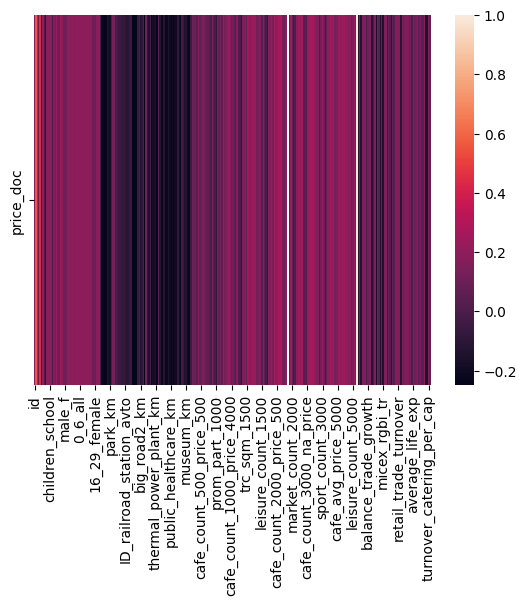

In [20]:
sns.heatmap(train_and_macro_together.corr(numeric_only=True).loc[['price_doc'],:])

In [21]:
train_and_macro_together.corr(numeric_only=True).loc[['price_doc'],:].unstack().sort_values().drop_duplicates()

kremlin_km          price_doc   -0.247002
zd_vokzaly_avto_km  price_doc   -0.246256
sadovoe_km          price_doc   -0.244215
nuclear_reactor_km  price_doc   -0.242833
bulvar_ring_km      price_doc   -0.242458
                                   ...   
life_sq             price_doc    0.363418
num_room            price_doc    0.441017
full_sq             price_doc    0.558189
price_doc           price_doc    1.000000
mosque_count_2000   price_doc         NaN
Length: 286, dtype: float64

Из полученной информации можно сделать вывод о том, что price_doc наиболее сильно коррелирует с параметрами full_sq, num_room, life_sq

Задание 6. "Статистики"

In [22]:
# Отобразим сводку данных предложенного датасета (основные статистики) за 2011 год
train_and_macro_together['timestamp'] = pd.to_datetime(train_and_macro_together['timestamp'])
train_and_macro_together[train_and_macro_together['timestamp'].dt.year == 2011].describe().loc[['mean'], ['price_doc', 'full_sq', 'life_sq', 'usdrub']]


,price_doc,full_sq,life_sq,usdrub
mean,5.619343e+06,47.350835,28.78043,31.195048


In [23]:
# Отобразим сводку данных предложенного датасета (основные статистики) за 2012 год
train_and_macro_together['timestamp'] = pd.to_datetime(train_and_macro_together['timestamp'])
train_and_macro_together[train_and_macro_together['timestamp'].dt.year == 2012].describe().loc[['mean'], ['price_doc', 'full_sq', 'life_sq', 'usdrub']]

,price_doc,full_sq,life_sq,usdrub
mean,5.842263e+06,50.875046,32.35983,31.042187


In [24]:
# Отобразим сводку данных предложенного датасета (основные статистики) за 2013 год
train_and_macro_together['timestamp'] = pd.to_datetime(train_and_macro_together['timestamp'])
train_and_macro_together[train_and_macro_together['timestamp'].dt.year == 2013].describe().loc[['mean'], ['price_doc', 'full_sq', 'life_sq', 'usdrub']]

,price_doc,full_sq,life_sq,usdrub
mean,6.302193e+06,52.325321,33.511954,32.079083


In [25]:
# Отобразим сводку данных предложенного датасета (основные статистики) за 2014 год
train_and_macro_together['timestamp'] = pd.to_datetime(train_and_macro_together['timestamp'])
train_and_macro_together[train_and_macro_together['timestamp'].dt.year == 2014].describe().loc[['mean'], ['price_doc', 'full_sq', 'life_sq', 'usdrub']]

,price_doc,full_sq,life_sq,usdrub
mean,6.940758e+06,51.86471,32.702365,39.642471


In [26]:
# Отобразим сводку данных предложенного датасета (основные статистики) за 2015 год
train_and_macro_together['timestamp'] = pd.to_datetime(train_and_macro_together['timestamp'])
train_and_macro_together[train_and_macro_together['timestamp'].dt.year == 2015].describe().loc[['mean'], ['price_doc', 'full_sq', 'life_sq', 'usdrub']]

,price_doc,full_sq,life_sq,usdrub
mean,7.643953e+06,54.92716,34.634948,57.637264


In [27]:
# Получим данные за 2023 год
moscow_2019_2024 = pd.read_csv("moscow.csv")
moscow_2019_2024['Даты'] = pd.to_datetime(moscow_2019_2024['Даты'], dayfirst=True)
moscow_2019_2024[moscow_2019_2024['Даты'].dt.year == 2023].describe().loc[['mean'], ['Квартиры в новостройке за м2', 'Квартиры вторичка за м2', 'Курс доллара']]

,Квартиры в новостройке за м2,Квартиры вторичка за м2,Курс доллара
mean,343618.728,374555.656,86.210696


In [28]:
# Получим данные за 2024 год
moscow_2019_2024 = pd.read_csv("moscow.csv")
moscow_2019_2024['Даты'] = pd.to_datetime(moscow_2019_2024['Даты'], dayfirst=True)
moscow_2019_2024[moscow_2019_2024['Даты'].dt.year == 2024].describe().loc[['mean'], ['Квартиры в новостройке за м2', 'Квартиры вторичка за м2', 'Курс доллара']]


,Квартиры в новостройке за м2,Квартиры вторичка за м2,Курс доллара
mean,356269.466667,418688.783333,90.7157


В 2011 году средняя цена за м2 составляла 118767 рублей при среднем курсе доллара 31.2 рубля.

В 2012 году средняя цена за м2 составляла 114835 рублей при среднем курсе доллара 31.04 рубля.

В 2013 году средняя цена за м2 составляла 120443 рублей при среднем курсе доллара 32 рубля.

В 2014 году средняя цена за м2 составляла 133836 рублей при среднем курсе доллара 39.64 рубля.

В 2015 году средняя цена за м2 составляла 139183 рублей при среднем курсе доллара 57.64 рубля.

Данные, полученные с сайта *msk.restate.ru*:

В 2023 году средняя цена за м2 составляла 343619 рублей при среднем курсе доллара 86.21 рубля.

В 2024 году средняя цена за м2 составляла 356270 рублей при среднем курсе доллара 90.71 рубля.

Прослеживается взаимосвязь между курсом доллара и ценой за один квадратный метр жилплощади. Чем выше курс доллара, тем выше исследуемая цена.

In [29]:
train_and_macro_together.to_csv("train_and_macro_together.csv")